# What are outliers?

"In statistics, an outlier is an observation point that is distant from other observations." [wikipedia](https://en.wikipedia.org/wiki/Outlier) <br>
"Outlier is something which is separate/different from the crowd." [Natasha Sharma](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba#50a7)

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

## Loading dataset

In [3]:
boston = load_boston()

In [4]:
x = boston.data
y = boston.target

In [5]:
columns = boston.feature_names

boston_df = pd.DataFrame(boston.data, columns=columns)

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Finding outliers

"There are two types of analysis we will follow to find the outliers <br>
- Uni-variate(one variable outlier analysis) and 
- Multi-variate(two or more variable outlier analysis)."

### Through visualization

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Box Plot** <br>
Outliers may be plotted as individual points.

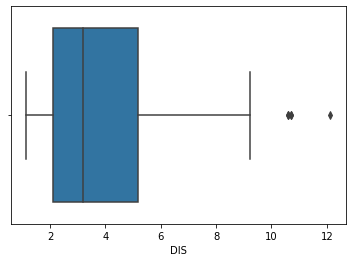

In [8]:
sns.boxplot(x=boston_df['DIS'])

The points between 10 to 12 are outliers.

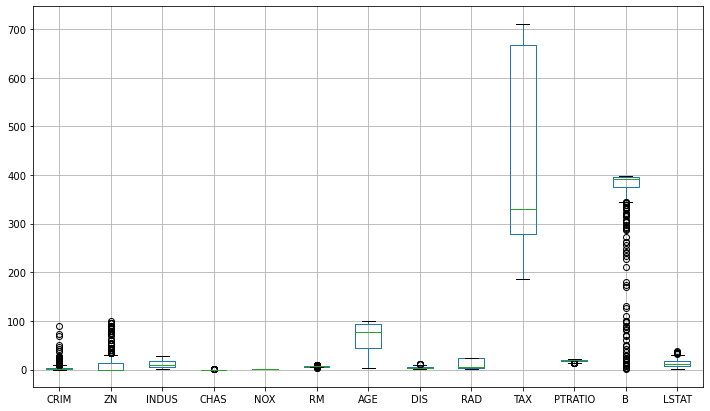

In [11]:
boston_df.boxplot(figsize=(12,7))

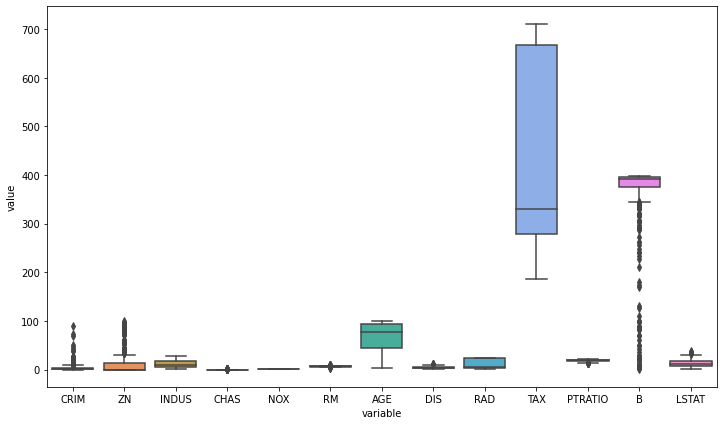

In [76]:
plt.figure(figsize=(12,7))
sns.boxplot(x="variable", y="value", data=pd.melt(boston_df))

Can we do the multivariate analysis with Box plot? Well it depends, if you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis.

**Scatter Plot** <br>
Points away from population are outliers.

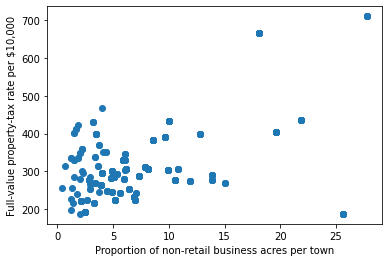

In [77]:
fig, ax = plt.subplots()
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

The points in the top right corner are outliers.

### Through mathematical function

**Z-Score** <br>
"data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers."

"note that the outlier’s presence throws off the Z-scores because it inflates the mean and standard deviation as we saw earlier. _If we calculated Z-scores without the outlier, they’d be different!_ Be aware that if your dataset contains outliers, Z-values are biased such that they appear to be less extreme (i.e., closer to zero)."

In [29]:
from scipy import stats

In [30]:
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [31]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

First array is the row and the second is the column. See the example below.

In [33]:
z[55][1]

3.375038763517309

**IQR Score** <br>
Box plot use the IQR method to display data and outliers(shape of the data).

In [34]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [40]:
print((boston_df < (Q1 - 1.5 * IQR))
     | (boston_df > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

## Removing outliers

**Z Score**

In [49]:
boston_df_remove_outliers = boston_df[(z < 3).all(axis=1)]

In [50]:
print('Boston shape: ')
print(boston_df.shape)
print('Boston shape without outliers: ')
print(boston_df_remove_outliers.shape)

Boston shape: 
(506, 13)
Boston shape without outliers: 
(415, 13)


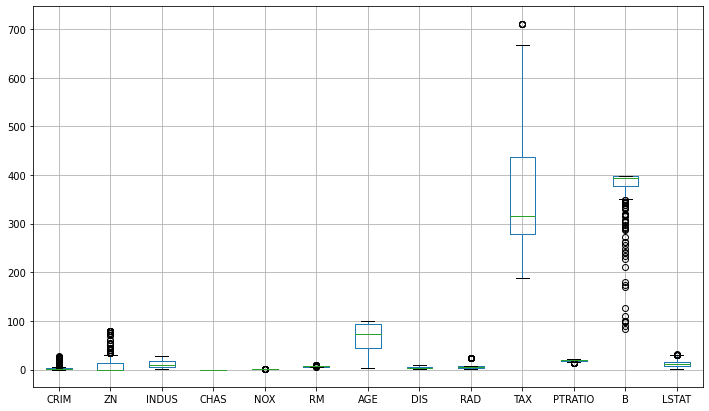

In [80]:
boston_df_remove_outliers.boxplot(figsize=(12,7))

- I realized that outliers still remained and someones were created.

**IQR Score**

In [51]:
boston_df_remove_outliers_2 = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) 
                                          | (boston_df > (Q3 + 1.5 * IQR)))
                                        .any(axis=1)]

In [52]:
print('Boston shape: ')
print(boston_df.shape)
print('Boston shape without outliers: ')
print(boston_df_remove_outliers_2.shape)

Boston shape: 
(506, 13)
Boston shape without outliers: 
(274, 13)


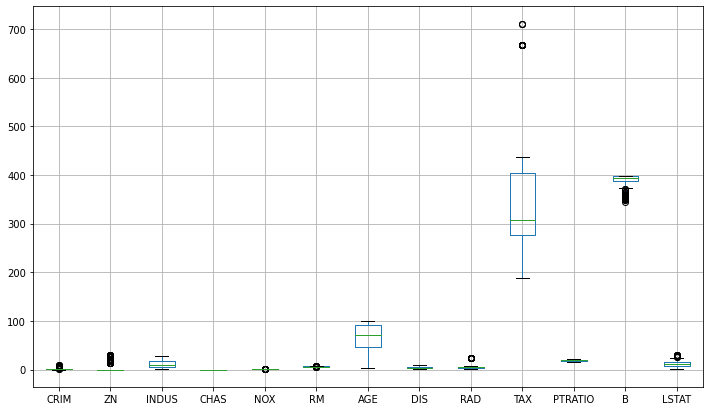

In [81]:
boston_df_remove_outliers_2.boxplot(figsize=(12,7))

- I realized that outliers still remained and someones were created.

# References:

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba#50a7

https://statisticsbyjim.com/basics/outliers/